# Get the Data & Libraries

In [173]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import the dataset
df=pd.read_csv('/Users/Jeff/Downloads/bank/bank-full.csv', sep=';')

In [3]:
#See what df looks like
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
#See the shape
df.shape

(45211, 17)

# Data cleaning

In [5]:
#Identify missing value
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see there is no missing value

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


As we can see there are 10 columns with object type

**1. Job**

In [7]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

As we can see, even if we didn't identify missing value, there are some with the value "unknown". \
So we decide to drop rows with the value unknown

In [8]:
df.drop(df[df.job == 'unknown'].index, inplace=True)

There are 12 differents type of job, as there are too many category we decide to drop this column.

In [9]:
df.drop('job', axis=1, inplace=True)

**2. Marital**

In [10]:
df.marital.value_counts()

married     27011
single      12722
divorced     5190
Name: marital, dtype: int64

There are 3 types of values, we will use one-hot encoding for the logistic regression and label encoder for the rest

In [11]:
# Create dummies (One-hot encoding)
dummies=[]
dummies.append('marital')

In [12]:
# Label encoder
dct={'single':1,
    'married':2,
    'divorced':3}

df.marital=df.marital.map(dct)

In [13]:
df.marital.value_counts()

2    27011
1    12722
3     5190
Name: marital, dtype: int64

**3. Education**

In [14]:
df.education.value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education, dtype: int64

We will first drop unknown value rows

In [15]:
df.drop(df[df.education == 'unknown'].index, inplace=True)

In [16]:
df.education.value_counts()

secondary    23131
tertiary     13262
primary       6800
Name: education, dtype: int64

As this is an ordinal column, we will transform this column into numeric

In [17]:
dct={'primary':1,
    'secondary':2,
    'tertiary':3}

In [18]:
df.education=df.education.map(dct)

In [19]:
df.education.value_counts()

2    23131
3    13262
1     6800
Name: education, dtype: int64

**4. Default**

In [20]:
df.default.value_counts()

no     42411
yes      782
Name: default, dtype: int64

As this is a boolean column, we will transform it as numerical

In [21]:
df.default=df.default.map({'yes': True, 'no': False})

**5. Housing**

In [22]:
df.housing.value_counts()

yes    24292
no     18901
Name: housing, dtype: int64

Same as default column

In [23]:
df.housing=df.housing.map({'yes': True, 'no': False})

**6. Loan**

In [24]:
df.loan.value_counts()

no     36086
yes     7107
Name: loan, dtype: int64

Same as default column

In [25]:
df.loan=df.loan.map({'yes': True, 'no': False})

**7. Contact**

In [26]:
df.contact.value_counts()

cellular     28213
unknown      12286
telephone     2694
Name: contact, dtype: int64

We don't consider that contact has a significant impact on the decision. So we decide to drop the column

In [27]:
df.drop('contact', axis=1, inplace=True)

**8. Month**

In [28]:
df.month.value_counts()

may    13192
jul     6601
aug     6037
jun     4980
nov     3842
apr     2820
feb     2533
jan     1318
oct      690
sep      532
mar      448
dec      200
Name: month, dtype: int64

As this is an ordinal column, we will transform this column into numeric

In [29]:
dct={'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12}

In [30]:
df.month=df.month.map(dct)

In [31]:
df.month.value_counts()

5     13192
7      6601
8      6037
6      4980
11     3842
4      2820
2      2533
1      1318
10      690
9       532
3       448
12      200
Name: month, dtype: int64

**9. poutcome**

In [32]:
df.poutcome.value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64

As we can see there is a very high amount of unknown value, we decide to drop this column as there are too many missing values.

In [33]:
df.drop('poutcome', axis=1, inplace=True)

**10. y**

In [34]:
df.y.value_counts()

no     38172
yes     5021
Name: y, dtype: int64

As this is a boolean column, we will transform it as numerical

In [35]:
df.y=df.y.map({'yes': True, 'no': False})

**11. pdays**

This columns corresponds to the number of days number of days that passed by after the client was last contacted from a previous campaign. \
As we can see there are some rows with the value -1 which correponds to the client not contacted.
We will assign the value 999 to the client who haven't been contacted

In [36]:
df['pdays']=np.where(df['pdays']==-1, 999, df['pdays'])

**12. Other manipulation**

Now, we need to run dummies function

In [37]:
df_dum=pd.get_dummies(data=df, columns=dummies)

Let's check if there is no more non-numeric features

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43193 non-null  int64
 1   marital    43193 non-null  int64
 2   education  43193 non-null  int64
 3   default    43193 non-null  bool 
 4   balance    43193 non-null  int64
 5   housing    43193 non-null  bool 
 6   loan       43193 non-null  bool 
 7   day        43193 non-null  int64
 8   month      43193 non-null  int64
 9   duration   43193 non-null  int64
 10  campaign   43193 non-null  int64
 11  pdays      43193 non-null  int64
 12  previous   43193 non-null  int64
 13  y          43193 non-null  bool 
dtypes: bool(4), int64(10)
memory usage: 3.8 MB


In [39]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43193 non-null  int64
 1   education  43193 non-null  int64
 2   default    43193 non-null  bool 
 3   balance    43193 non-null  int64
 4   housing    43193 non-null  bool 
 5   loan       43193 non-null  bool 
 6   day        43193 non-null  int64
 7   month      43193 non-null  int64
 8   duration   43193 non-null  int64
 9   campaign   43193 non-null  int64
 10  pdays      43193 non-null  int64
 11  previous   43193 non-null  int64
 12  y          43193 non-null  bool 
 13  marital_1  43193 non-null  uint8
 14  marital_2  43193 non-null  uint8
 15  marital_3  43193 non-null  uint8
dtypes: bool(4), int64(9), uint8(3)
memory usage: 3.6 MB


We will rescale our dataframes

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()

In [42]:
df_sca=df.copy()
df_dum_sca=df_dum.copy()

df_sca[['age','balance','duration','day','month','campaign','pdays']]=scaler.fit_transform(df[['age','balance','duration','day','month','campaign','pdays']])
df_dum_sca[['age','balance','duration','day','month','campaign','pdays']]=scaler.transform(df_dum[['age','balance','duration','day','month','campaign','pdays']])

# Features selection

## Correlation threshold

We will create a new dataframe without correlation between columns above 90%

### Original df

In [43]:
df.corr()

age   marital  education   default   balance   housing  \
age        1.000000  0.403288  -0.167092 -0.016245  0.097602 -0.185152   
marital    0.403288  1.000000  -0.122251  0.006891 -0.002058  0.013112   
education -0.167092 -0.122251   1.000000 -0.012011  0.069432 -0.080456   
default   -0.016245  0.006891  -0.012011  1.000000 -0.066458 -0.009031   
balance    0.097602 -0.002058   0.069432 -0.066458  1.000000 -0.067037   
housing   -0.185152  0.013112  -0.080456 -0.009031 -0.067037  1.000000   
loan      -0.010029  0.046938  -0.028293  0.076025 -0.084378  0.037004   
day       -0.008451  0.005032   0.025957  0.008823  0.004118 -0.029826   
month      0.094109  0.049605   0.073334  0.015964  0.094138 -0.175594   
duration  -0.004953 -0.013029   0.002482 -0.011040  0.020051  0.004017   
campaign   0.004050  0.007872   0.004201  0.016441 -0.016251 -0.025554   
pdays     -0.008504  0.025740  -0.050801  0.040092 -0.037482 -0.040879   
previous   0.001099 -0.014967   0.024938 -0.017893  0.016564  0.036803   
y          0.024760 -0.045749   0.070920 -0.023244  0.051386 -0.138300   

               loan       day     month  duration  campaign     pdays  \
age       -0.010029 -0.008451  0.094109 -0.004953  0.004050 -0.008504   
marital    0.046938  0.005032  0.049605 -0.013029  0.007872  0.025740   
education -0.028293  0.025957  0.073334  0.002482  0.004201 -0.050801   
default    0.076025  0.008823  0.015964 -0.011040  0.016441  0.040092   
balance   -0.084378  0.004118  0.094138  0.020051 -0.016251 -0.037482   
housing    0.037004 -0.029826 -0.175594  0.004017 -0.025554 -0.040879   
loan       1.000000  0.010957  0.020067 -0.013230  0.010447  0.032856   
day        0.010957  1.000000  0.105959 -0.030074  0.164982  0.081210   
month      0.020067  0.105959  1.000000 -0.013339  0.055813  0.044017   
duration  -0.013230 -0.030074 -0.013339  1.000000 -0.083118 -0.004431   
campaign   0.010447  0.164982  0.055813 -0.083118  1.000000  0.108676   
pdays      0.032856  0.081210  0.044017 -0.004431  0.108676  1.000000   
previous  -0.011367 -0.052053 -0.037150  0.000295 -0.032381 -0.525055   
y         -0.068802 -0.030247  0.016888  0.397393 -0.072465 -0.175740   

           previous         y  
age        0.001099  0.024760  
marital   -0.014967 -0.045749  
education  0.024938  0.070920  
default   -0.017893 -0.023244  
balance    0.016564  0.051386  
housing    0.036803 -0.138300  
loan      -0.011367 -0.068802  
day       -0.052053 -0.030247  
month     -0.037150  0.016888  
duration   0.000295  0.397393  
campaign  -0.032381 -0.072465  
pdays     -0.525055 -0.175740  
previous   1.000000  0.091764  
y          0.091764  1.000000

As we can there isn't any column highly correlated to another column. \
So we don't need to drop column at this stage

### Rescale df

In [44]:
df_dum.corr()

age  education   default   balance   housing      loan  \
age        1.000000  -0.167092 -0.016245  0.097602 -0.185152 -0.010029   
education -0.167092   1.000000 -0.012011  0.069432 -0.080456 -0.028293   
default   -0.016245  -0.012011  1.000000 -0.066458 -0.009031  0.076025   
balance    0.097602   0.069432 -0.066458  1.000000 -0.067037 -0.084378   
housing   -0.185152  -0.080456 -0.009031 -0.067037  1.000000  0.037004   
loan      -0.010029  -0.028293  0.076025 -0.084378  0.037004  1.000000   
day       -0.008451   0.025957  0.008823  0.004118 -0.029826  0.010957   
month      0.094109   0.073334  0.015964  0.094138 -0.175594  0.020067   
duration  -0.004953   0.002482 -0.011040  0.020051  0.004017 -0.013230   
campaign   0.004050   0.004201  0.016441 -0.016251 -0.025554  0.010447   
pdays     -0.008504  -0.050801  0.040092 -0.037482 -0.040879  0.032856   
previous   0.001099   0.024938 -0.017893  0.016564  0.036803 -0.011367   
y          0.024760   0.070920 -0.023244  0.051386 -0.138300 -0.068802   
marital_1 -0.425297   0.162962  0.002998 -0.012897 -0.018758 -0.052478   
marital_2  0.280298  -0.147578 -0.014092  0.026283  0.018183  0.038101   
marital_3  0.169244  -0.003499  0.017309 -0.022024 -0.001423  0.015516   

                day     month  duration  campaign     pdays  previous  \
age       -0.008451  0.094109 -0.004953  0.004050 -0.008504  0.001099   
education  0.025957  0.073334  0.002482  0.004201 -0.050801  0.024938   
default    0.008823  0.015964 -0.011040  0.016441  0.040092 -0.017893   
balance    0.004118  0.094138  0.020051 -0.016251 -0.037482  0.016564   
housing   -0.029826 -0.175594  0.004017 -0.025554 -0.040879  0.036803   
loan       0.010957  0.020067 -0.013230  0.010447  0.032856 -0.011367   
day        1.000000  0.105959 -0.030074  0.164982  0.081210 -0.052053   
month      0.105959  1.000000 -0.013339  0.055813  0.044017 -0.037150   
duration  -0.030074 -0.013339  1.000000 -0.083118 -0.004431  0.000295   
campaign   0.164982  0.055813 -0.083118  1.000000  0.108676 -0.032381   
pdays      0.081210  0.044017 -0.004431  0.108676  1.000000 -0.525055   
previous  -0.052053 -0.037150  0.000295 -0.032381 -0.525055  1.000000   
y         -0.030247  0.016888  0.397393 -0.072465 -0.175740  0.091764   
marital_1 -0.006778 -0.067555  0.020835 -0.021829 -0.030499  0.016892   
marital_2  0.006203  0.062512 -0.022105  0.030353  0.024060 -0.012440   
marital_3  0.000046 -0.000589  0.004496 -0.015694  0.006091 -0.004725   

                  y  marital_1  marital_2  marital_3  
age        0.024760  -0.425297   0.280298   0.169244  
education  0.070920   0.162962  -0.147578  -0.003499  
default   -0.023244   0.002998  -0.014092   0.017309  
balance    0.051386  -0.012897   0.026283  -0.022024  
housing   -0.138300  -0.018758   0.018183  -0.001423  
loan      -0.068802  -0.052478   0.038101   0.015516  
day       -0.030247  -0.006778   0.006203   0.000046  
month      0.016888  -0.067555   0.062512  -0.000589  
duration   0.397393   0.020835  -0.022105   0.004496  
campaign  -0.072465  -0.021829   0.030353  -0.015694  
pdays     -0.175740  -0.030499   0.024060   0.006091  
previous   0.091764   0.016892  -0.012440  -0.004725  
y          1.000000   0.064084  -0.060928   0.003044  
marital_1  0.064084   1.000000  -0.770367  -0.227973  
marital_2 -0.060928  -0.770367   1.000000  -0.445188  
marital_3  0.003044  -0.227973  -0.445188   1.000000

Same as df1, no need to drop column at this stage

## Filters

In [45]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split

In [46]:
df.head()

age  marital  education  default  balance  housing   loan  day  month  \
0   58        2          3    False     2143     True  False    5      5   
1   44        1          2    False       29     True  False    5      5   
2   33        2          2    False        2     True   True    5      5   
5   35        2          3    False      231     True  False    5      5   
6   28        1          3    False      447     True   True    5      5   

   duration  campaign  pdays  previous      y  
0       261         1    999         0  False  
1       151         1    999         0  False  
2        76         1    999         0  False  
5       139         1    999         0  False  
6       217         1    999         0  False

### Categorical variables

We extract every categorical columns

In [47]:
X_cat=df[['marital','education','default','housing','loan','day','month']]
y_cat=df.y

In [48]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, \
                                                  y_cat, \
                                                  train_size=0.8, \
                                                  random_state=42, \
                                                  stratify=df.y)

In [49]:
fs_cat = SelectKBest(score_func=chi2, k=3)
fs_cat.fit(X_train_cat, y_train_cat)
X_train_fs_cat = fs_cat.transform(X_train_cat)
X_test_fs_cat = fs_cat.transform(X_test_cat)

In [52]:
for i in range(len(fs_cat.scores_)):
    print('Feature %d: %f' % (i, fs_cat.scores_[i]))

Feature 0: 13.788202
Feature 1: 35.075733
Feature 2: 18.680025
Feature 3: 299.014909
Feature 4: 129.915657
Feature 5: 123.822665
Feature 6: 7.696064


In [53]:
X_test_fs_cat

array([[True, False, 15],
       [True, False, 15],
       [False, False, 6],
       ...,
       [True, True, 10],
       [False, False, 9],
       [True, False, 27]], dtype=object)

In [54]:
selection_cat=X_cat.columns[fs_cat.get_support()]
selection_cat

Index(['housing', 'loan', 'day'], dtype='object')

### Numerical variables

In [55]:
X_num=df[['age','balance','duration','campaign','pdays','previous']]
y_num=df.y

In [56]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, \
                                                  y_num, \
                                                  train_size=0.8, \
                                                  random_state=42, \
                                                  stratify=df.y)

In [57]:
fs_num = SelectKBest(score_func=f_classif, k=3)
fs_num.fit(X_train_num, y_train_num)
X_train_fs_num = fs_num.transform(X_train_num)
X_test_fs_num = fs_num.transform(X_test_num)

In [58]:
for i in range(len(fs_num.scores_)):
    print('Feature %d: %f' % (i, fs_num.scores_[i]))

Feature 0: 19.951249
Feature 1: 90.345891
Feature 2: 6302.925929
Feature 3: 175.407283
Feature 4: 1143.872550
Feature 5: 285.030393


In [59]:
selection_num=X_num.columns[fs_num.get_support()]
selection_num

Index(['duration', 'pdays', 'previous'], dtype='object')

### Merging features selections

In [73]:
X_fs=df[['duration', 'pdays', 'previous','housing', 'loan', 'day']]
y_fs=df.y

In [74]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, \
                                                  y_fs, \
                                                  train_size=0.8, \
                                                  random_state=42, \
                                                  stratify=df.y)

# Modelling

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, r2_score

In [63]:
X=df.drop('y', axis=1)
y=df.y

X_sca=df_sca.drop('y', axis=1)
y_sca=df_sca.y

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, \
                                                  y, \
                                                  train_size=0.8, \
                                                  random_state=42, \
                                                  stratify=df.y)

X_train_sca, X_test_sca, y_train_sca, y_test_sca = train_test_split(X_sca, \
                                                  y_sca, \
                                                  train_size=0.8, \
                                                  random_state=42, \
                                                  stratify=df_sca.y)

## Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

### Original df

In [66]:
model1=DecisionTreeClassifier()
model1.fit(X_train, y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test, y_pred1)
acc1=accuracy_score(y_test, y_pred1)
rec1=recall_score(y_test, y_pred1)
pre1=precision_score(y_test, y_pred1)
f11=f1_score(y_test, y_pred1)
display(conf1)
print('Accuracy', acc1)
print('Recall', rec1)
print('Precision', pre1)
print('F1', f11)

array([[7058,  577],
       [ 522,  482]])

Accuracy 0.8727862021067253
Recall 0.4800796812749004
Precision 0.45514636449480644
F1 0.4672806592341251


### Original df with rescale

In [67]:
model1_sca=DecisionTreeClassifier()
model1_sca.fit(X_train_sca, y_train_sca)
y_pred1_sca=model1_sca.predict(X_test_sca)
conf1_sca=confusion_matrix(y_test_sca, y_pred1_sca)
acc1_sca=accuracy_score(y_test_sca, y_pred1_sca)
rec1_sca=recall_score(y_test_sca, y_pred1_sca)
pre1_sca=precision_score(y_test_sca, y_pred1_sca)
f11_sca=f1_score(y_test_sca, y_pred1_sca)
display(conf1_sca)
print('Accuracy', acc1_sca)
print('Recall', rec1_sca)
print('Precision', pre1_sca)
print('F1', f11_sca)

array([[7060,  575],
       [ 527,  477]])

Accuracy 0.872438939692094
Recall 0.4750996015936255
Precision 0.4534220532319392
F1 0.46400778210116733


### Features selection df

In [76]:
model1_fs=DecisionTreeClassifier()
model1_fs.fit(X_train_fs, y_train_fs)
y_pred1_fs=model1_fs.predict(X_test_fs)
conf1_fs=confusion_matrix(y_test_fs, y_pred1_fs)
acc1_fs=accuracy_score(y_test_fs, y_pred1_fs)
rec1_fs=recall_score(y_test_fs, y_pred1_fs)
pre1_fs=precision_score(y_test_fs, y_pred1_fs)
f11_fs=f1_score(y_test_fs, y_pred1_fs)
display(conf1_fs)
print('Accuracy', acc1_fs)
print('Recall', rec1_fs)
print('Precision', pre1_fs)
print('F1', f11_fs)

array([[7068,  567],
       [ 603,  401]])

Accuracy 0.864567658293784
Recall 0.399402390438247
Precision 0.4142561983471074
F1 0.4066937119675456


## Random Forest

In [69]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

### Original df

In [70]:
model2=RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)
conf2=confusion_matrix(y_test, y_pred2)
acc2=accuracy_score(y_test, y_pred2)
rec2=recall_score(y_test, y_pred2)
pre2=precision_score(y_test, y_pred2)
f12=f1_score(y_test, y_pred2)
display(conf2)
print('Accuracy', acc2)
print('Recall', rec2)
print('Precision', pre2)
print('F1', f12)

array([[7389,  246],
       [ 601,  403]])

Accuracy 0.9019562449357564
Recall 0.40139442231075695
Precision 0.6209553158705701
F1 0.48759830611010285


### Original df with rescale

In [71]:
model2_sca=RandomForestClassifier()
model2_sca.fit(X_train_sca, y_train_sca)
y_pred2_sca=model2_sca.predict(X_test_sca)
conf2_sca=confusion_matrix(y_test_sca, y_pred2_sca)
acc2_sca=accuracy_score(y_test_sca, y_pred2_sca)
rec2_sca=recall_score(y_test_sca, y_pred2_sca)
pre2_sca=precision_score(y_test_sca, y_pred2_sca)
f12_sca=f1_score(y_test_sca, y_pred2_sca)
display(conf2_sca)
print('Accuracy', acc2_sca)
print('Recall', rec2_sca)
print('Precision', pre2_sca)
print('F1', f12_sca)

array([[7403,  232],
       [ 610,  394]])

Accuracy 0.9025350156268087
Recall 0.39243027888446214
Precision 0.6293929712460063
F1 0.4834355828220859


### Features selection df

In [77]:
model2_fs=RandomForestClassifier()
model2_fs.fit(X_train_fs, y_train_fs)
y_pred2_fs=model2_fs.predict(X_test_fs)
conf2_fs=confusion_matrix(y_test_fs, y_pred2_fs)
acc2_fs=accuracy_score(y_test_fs, y_pred2_fs)
rec2_fs=recall_score(y_test_fs, y_pred2_fs)
pre2_fs=precision_score(y_test_fs, y_pred2_fs)
f12_fs=f1_score(y_test_fs, y_pred2_fs)
display(conf2_fs)
print('Accuracy', acc2_fs)
print('Recall', rec2_fs)
print('Precision', pre2_fs)
print('F1', f12_fs)

array([[7221,  414],
       [ 619,  385]])

Accuracy 0.8804259752286144
Recall 0.3834661354581673
Precision 0.4818523153942428
F1 0.42706600110926235


## Random Forest balanced

### Orginal df

In [143]:
model3=RandomForestClassifier(class_weight='balanced')
model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test, y_pred3)
acc3=accuracy_score(y_test, y_pred3)
rec3=recall_score(y_test, y_pred3)
pre3=precision_score(y_test, y_pred3)
f13=f1_score(y_test, y_pred3)
display(conf3)
print('Accuracy', acc3)
print('Recall', rec3)
print('Precision', pre3)
print('F1', f13)

array([[7445,  190],
       [ 675,  329]])

Accuracy 0.8998726704479685
Recall 0.32768924302788843
Precision 0.6339113680154143
F1 0.43204202232435984


### Original df with rescale

In [142]:
model3_sca=RandomForestClassifier(class_weight='balanced')
model3_sca.fit(X_train_sca, y_train_sca)
y_pred3_sca=model3_sca.predict(X_test_sca)
conf3_sca=confusion_matrix(y_test_sca, y_pred3_sca)
acc3_sca=accuracy_score(y_test_sca, y_pred3_sca)
rec3_sca=recall_score(y_test_sca, y_pred3_sca)
pre3_sca=precision_score(y_test_sca, y_pred3_sca)
f13_sca=f1_score(y_test_sca, y_pred3_sca)
display(conf3_sca)
print('Accuracy', acc3_sca)
print('Recall', rec3_sca)
print('Precision', pre3_sca)
print('F1', f13_sca)

array([[7449,  186],
       [ 656,  348]])

Accuracy 0.9025350156268087
Recall 0.3466135458167331
Precision 0.651685393258427
F1 0.45253576072821855


### Features selection df

In [140]:
model3_fs=RandomForestClassifier(class_weight='balanced')
model3_fs.fit(X_train_fs, y_train_fs)
y_pred3_fs=model3_fs.predict(X_test_fs)
conf3_fs=confusion_matrix(y_test_fs, y_pred3_fs)
acc3_fs=accuracy_score(y_test_fs, y_pred3_fs)
rec3_fs=recall_score(y_test_fs, y_pred3_fs)
pre3_fs=precision_score(y_test_fs, y_pred3_fs)
f13_fs=f1_score(y_test_fs, y_pred3_fs)
display(conf3_fs)
print('Accuracy', acc3_fs)
print('Recall', rec3_fs)
print('Precision', pre3_fs)
print('F1', f13_fs)

array([[7156,  479],
       [ 619,  385]])

Accuracy 0.8729019562449357
Recall 0.3834661354581673
Precision 0.44560185185185186
F1 0.4122055674518201


## XGBoost

In [79]:
from xgboost import XGBClassifier

### Original df

In [80]:
model4=XGBClassifier()
model4.fit(X_train, y_train)
y_pred4=model1.predict(X_test)
conf4=confusion_matrix(y_test, y_pred4)
acc4=accuracy_score(y_test, y_pred4)
rec4=recall_score(y_test, y_pred4)
pre4=precision_score(y_test, y_pred4)
f14=f1_score(y_test, y_pred4)
display(conf4)
print('Accuracy', acc4)
print('Recall', rec4)
print('Precision', pre4)
print('F1', f14)

array([[7058,  577],
       [ 522,  482]])

Accuracy 0.8727862021067253
Recall 0.4800796812749004
Precision 0.45514636449480644
F1 0.4672806592341251


### Original df with rescale

In [81]:
model4_sca=XGBClassifier()
model4_sca.fit(X_train_sca, y_train_sca)
y_pred4_sca=model4_sca.predict(X_test_sca)
conf4_sca=confusion_matrix(y_test_sca, y_pred4_sca)
acc4_sca=accuracy_score(y_test_sca, y_pred4_sca)
rec4_sca=recall_score(y_test_sca, y_pred4_sca)
pre4_sca=precision_score(y_test_sca, y_pred4_sca)
f14_sca=f1_score(y_test_sca, y_pred4_sca)
display(conf4_sca)
print('Accuracy', acc4_sca)
print('Recall', rec4_sca)
print('Precision', pre4_sca)
print('F1', f14_sca)

array([[7368,  267],
       [ 518,  486]])

Accuracy 0.9091330015048038
Recall 0.48406374501992033
Precision 0.6454183266932271
F1 0.5532157085941948


In [215]:
y_test.value_counts(normalize=True)

False    0.883783
True     0.116217
Name: y, dtype: float64

### Features selection df

In [82]:
model4_fs=XGBClassifier()
model4_fs.fit(X_train_fs, y_train_fs)
y_pred4_fs=model4_fs.predict(X_test_fs)
conf4_fs=confusion_matrix(y_test_fs, y_pred4_fs)
acc4_fs=accuracy_score(y_test_fs, y_pred4_fs)
rec4_fs=recall_score(y_test_fs, y_pred4_fs)
pre4_fs=precision_score(y_test_fs, y_pred4_fs)
f14_fs=f1_score(y_test_fs, y_pred4_fs)
display(conf4_fs)
print('Accuracy', acc4_fs)
print('Recall', rec4_fs)
print('Precision', pre4_fs)
print('F1', f14_fs)

array([[7395,  240],
       [ 645,  359]])

Accuracy 0.8975575876837597
Recall 0.35756972111553786
Precision 0.5993322203672788
F1 0.44791016843418596


## AdaBoost

### Original df

In [83]:
model5=AdaBoostClassifier()
model5.fit(X_train, y_train)
y_pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test, y_pred5)
acc5=accuracy_score(y_test, y_pred5)
rec5=recall_score(y_test, y_pred5)
pre5=precision_score(y_test, y_pred5)
f15=f1_score(y_test, y_pred5)
display(conf5)
print('Accuracy', acc5)
print('Recall', rec5)
print('Precision', pre5)
print('F1', f15)

array([[7395,  240],
       [ 663,  341]])

Accuracy 0.8954740131959718
Recall 0.3396414342629482
Precision 0.5869191049913941
F1 0.4302839116719242


### Original df with rescale

In [84]:
model5_sca=AdaBoostClassifier()
model5_sca.fit(X_train_sca, y_train_sca)
y_pred5_sca=model5_sca.predict(X_test_sca)
conf5_sca=confusion_matrix(y_test_sca, y_pred5_sca)
acc5_sca=accuracy_score(y_test_sca, y_pred5_sca)
rec5_sca=recall_score(y_test_sca, y_pred5_sca)
pre5_sca=precision_score(y_test_sca, y_pred5_sca)
f15_sca=f1_score(y_test_sca, y_pred5_sca)
display(conf5_sca)
print('Accuracy', acc5_sca)
print('Recall', rec5_sca)
print('Precision', pre5_sca)
print('F1', f15_sca)

array([[7395,  240],
       [ 663,  341]])

Accuracy 0.8954740131959718
Recall 0.3396414342629482
Precision 0.5869191049913941
F1 0.4302839116719242


### Features selection df

In [85]:
model5_fs=AdaBoostClassifier()
model5_fs.fit(X_train_fs, y_train_fs)
y_pred5_fs=model5_fs.predict(X_test_fs)
conf5_fs=confusion_matrix(y_test_fs, y_pred5_fs)
acc5_fs=accuracy_score(y_test_fs, y_pred5_fs)
rec5_fs=recall_score(y_test_fs, y_pred5_fs)
pre5_fs=precision_score(y_test_fs, y_pred5_fs)
f15_fs=f1_score(y_test_fs, y_pred5_fs)
display(conf5_fs)
print('Accuracy', acc5_fs)
print('Recall', rec5_fs)
print('Precision', pre5_fs)
print('F1', f15_fs)

array([[7410,  225],
       [ 707,  297]])

Accuracy 0.8921171431878689
Recall 0.2958167330677291
Precision 0.5689655172413793
F1 0.38925294888597645


## CatBoost

In [86]:
from catboost import CatBoostClassifier

### Original df

In [87]:
model6=CatBoostClassifier()
model6.fit(X_train, y_train)
y_pred6=model6.predict(X_test)
conf6=confusion_matrix(y_test, [eval(i) for i in y_pred6])
acc6=accuracy_score(y_test, [eval(i) for i in y_pred6])
rec6=recall_score(y_test, [eval(i) for i in y_pred6])
pre6=precision_score(y_test, [eval(i) for i in y_pred6])
f16=f1_score(y_test, [eval(i) for i in y_pred6])
display(conf6)
print('Accuracy', acc6)
print('Recall', rec6)
print('Precision', pre6)
print('F1', f16)

Learning rate set to 0.04676
0:	learn: 0.6351737	total: 76.6ms	remaining: 1m 16s
1:	learn: 0.5873604	total: 90.9ms	remaining: 45.4s
2:	learn: 0.5468958	total: 105ms	remaining: 34.8s
3:	learn: 0.5143567	total: 118ms	remaining: 29.4s
4:	learn: 0.4818544	total: 131ms	remaining: 26s
5:	learn: 0.4549818	total: 145ms	remaining: 23.9s
6:	learn: 0.4309298	total: 159ms	remaining: 22.5s
7:	learn: 0.4098023	total: 172ms	remaining: 21.4s
8:	learn: 0.3914715	total: 186ms	remaining: 20.5s
9:	learn: 0.3760344	total: 208ms	remaining: 20.6s
10:	learn: 0.3601785	total: 235ms	remaining: 21.2s
11:	learn: 0.3464369	total: 263ms	remaining: 21.7s
12:	learn: 0.3378181	total: 297ms	remaining: 22.6s
13:	learn: 0.3286389	total: 316ms	remaining: 22.3s
14:	learn: 0.3199528	total: 339ms	remaining: 22.3s
15:	learn: 0.3116207	total: 359ms	remaining: 22.1s
16:	learn: 0.3050435	total: 376ms	remaining: 21.7s
17:	learn: 0.3010721	total: 390ms	remaining: 21.3s
18:	learn: 0.2952676	total: 404ms	remaining: 20.9s
19:	learn: 

169:	learn: 0.2041285	total: 3.54s	remaining: 17.3s
170:	learn: 0.2040197	total: 3.57s	remaining: 17.3s
171:	learn: 0.2038615	total: 3.59s	remaining: 17.3s
172:	learn: 0.2036099	total: 3.61s	remaining: 17.3s
173:	learn: 0.2035222	total: 3.62s	remaining: 17.2s
174:	learn: 0.2034244	total: 3.64s	remaining: 17.2s
175:	learn: 0.2033213	total: 3.65s	remaining: 17.1s
176:	learn: 0.2032260	total: 3.67s	remaining: 17.1s
177:	learn: 0.2030948	total: 3.68s	remaining: 17s
178:	learn: 0.2029810	total: 3.7s	remaining: 17s
179:	learn: 0.2028623	total: 3.71s	remaining: 16.9s
180:	learn: 0.2027936	total: 3.73s	remaining: 16.9s
181:	learn: 0.2027287	total: 3.74s	remaining: 16.8s
182:	learn: 0.2026119	total: 3.77s	remaining: 16.8s
183:	learn: 0.2025155	total: 3.8s	remaining: 16.9s
184:	learn: 0.2023929	total: 3.84s	remaining: 16.9s
185:	learn: 0.2022243	total: 3.87s	remaining: 16.9s
186:	learn: 0.2020613	total: 3.89s	remaining: 16.9s
187:	learn: 0.2019293	total: 3.91s	remaining: 16.9s
188:	learn: 0.2018

327:	learn: 0.1886414	total: 8.76s	remaining: 17.9s
328:	learn: 0.1885764	total: 8.87s	remaining: 18.1s
329:	learn: 0.1884881	total: 8.93s	remaining: 18.1s
330:	learn: 0.1884116	total: 8.99s	remaining: 18.2s
331:	learn: 0.1883174	total: 9.02s	remaining: 18.1s
332:	learn: 0.1882370	total: 9.04s	remaining: 18.1s
333:	learn: 0.1881372	total: 9.05s	remaining: 18.1s
334:	learn: 0.1880556	total: 9.07s	remaining: 18s
335:	learn: 0.1880254	total: 9.08s	remaining: 17.9s
336:	learn: 0.1880106	total: 9.09s	remaining: 17.9s
337:	learn: 0.1878827	total: 9.11s	remaining: 17.8s
338:	learn: 0.1878102	total: 9.13s	remaining: 17.8s
339:	learn: 0.1877415	total: 9.14s	remaining: 17.7s
340:	learn: 0.1876620	total: 9.15s	remaining: 17.7s
341:	learn: 0.1876089	total: 9.17s	remaining: 17.6s
342:	learn: 0.1875389	total: 9.18s	remaining: 17.6s
343:	learn: 0.1873923	total: 9.2s	remaining: 17.5s
344:	learn: 0.1873125	total: 9.22s	remaining: 17.5s
345:	learn: 0.1872426	total: 9.24s	remaining: 17.5s
346:	learn: 0.1

488:	learn: 0.1772168	total: 12.7s	remaining: 13.3s
489:	learn: 0.1771770	total: 12.8s	remaining: 13.3s
490:	learn: 0.1771316	total: 12.8s	remaining: 13.3s
491:	learn: 0.1770644	total: 12.8s	remaining: 13.2s
492:	learn: 0.1769991	total: 12.8s	remaining: 13.2s
493:	learn: 0.1769261	total: 12.9s	remaining: 13.2s
494:	learn: 0.1769059	total: 12.9s	remaining: 13.1s
495:	learn: 0.1768649	total: 12.9s	remaining: 13.1s
496:	learn: 0.1767920	total: 12.9s	remaining: 13.1s
497:	learn: 0.1767388	total: 12.9s	remaining: 13s
498:	learn: 0.1766576	total: 12.9s	remaining: 13s
499:	learn: 0.1766014	total: 13s	remaining: 13s
500:	learn: 0.1765534	total: 13s	remaining: 12.9s
501:	learn: 0.1765090	total: 13s	remaining: 12.9s
502:	learn: 0.1764503	total: 13s	remaining: 12.9s
503:	learn: 0.1763772	total: 13s	remaining: 12.8s
504:	learn: 0.1762973	total: 13s	remaining: 12.8s
505:	learn: 0.1762535	total: 13.1s	remaining: 12.7s
506:	learn: 0.1761886	total: 13.1s	remaining: 12.7s
507:	learn: 0.1761599	total: 1

648:	learn: 0.1686347	total: 15.4s	remaining: 8.33s
649:	learn: 0.1685762	total: 15.4s	remaining: 8.31s
650:	learn: 0.1685122	total: 15.5s	remaining: 8.29s
651:	learn: 0.1684697	total: 15.5s	remaining: 8.26s
652:	learn: 0.1684103	total: 15.5s	remaining: 8.23s
653:	learn: 0.1683509	total: 15.5s	remaining: 8.2s
654:	learn: 0.1683086	total: 15.5s	remaining: 8.17s
655:	learn: 0.1682761	total: 15.5s	remaining: 8.15s
656:	learn: 0.1682305	total: 15.5s	remaining: 8.12s
657:	learn: 0.1681971	total: 15.6s	remaining: 8.09s
658:	learn: 0.1681557	total: 15.6s	remaining: 8.06s
659:	learn: 0.1681073	total: 15.6s	remaining: 8.03s
660:	learn: 0.1680659	total: 15.6s	remaining: 8.01s
661:	learn: 0.1680296	total: 15.6s	remaining: 7.98s
662:	learn: 0.1679746	total: 15.7s	remaining: 7.96s
663:	learn: 0.1679255	total: 15.7s	remaining: 7.93s
664:	learn: 0.1678903	total: 15.7s	remaining: 7.9s
665:	learn: 0.1678354	total: 15.7s	remaining: 7.88s
666:	learn: 0.1677788	total: 15.7s	remaining: 7.85s
667:	learn: 0.

812:	learn: 0.1613060	total: 18.2s	remaining: 4.18s
813:	learn: 0.1612884	total: 18.2s	remaining: 4.16s
814:	learn: 0.1612530	total: 18.2s	remaining: 4.13s
815:	learn: 0.1612231	total: 18.2s	remaining: 4.11s
816:	learn: 0.1611617	total: 18.2s	remaining: 4.09s
817:	learn: 0.1611180	total: 18.3s	remaining: 4.06s
818:	learn: 0.1610755	total: 18.3s	remaining: 4.04s
819:	learn: 0.1610098	total: 18.3s	remaining: 4.01s
820:	learn: 0.1609768	total: 18.3s	remaining: 3.99s
821:	learn: 0.1609381	total: 18.3s	remaining: 3.97s
822:	learn: 0.1608858	total: 18.3s	remaining: 3.94s
823:	learn: 0.1608453	total: 18.4s	remaining: 3.92s
824:	learn: 0.1607946	total: 18.4s	remaining: 3.9s
825:	learn: 0.1607595	total: 18.4s	remaining: 3.87s
826:	learn: 0.1607481	total: 18.4s	remaining: 3.85s
827:	learn: 0.1607190	total: 18.4s	remaining: 3.83s
828:	learn: 0.1606819	total: 18.4s	remaining: 3.81s
829:	learn: 0.1606643	total: 18.5s	remaining: 3.78s
830:	learn: 0.1606089	total: 18.5s	remaining: 3.76s
831:	learn: 0

978:	learn: 0.1546429	total: 20.9s	remaining: 449ms
979:	learn: 0.1546048	total: 21s	remaining: 428ms
980:	learn: 0.1545614	total: 21s	remaining: 406ms
981:	learn: 0.1545198	total: 21s	remaining: 385ms
982:	learn: 0.1544886	total: 21s	remaining: 363ms
983:	learn: 0.1544580	total: 21s	remaining: 342ms
984:	learn: 0.1544030	total: 21s	remaining: 321ms
985:	learn: 0.1543612	total: 21.1s	remaining: 299ms
986:	learn: 0.1543205	total: 21.1s	remaining: 278ms
987:	learn: 0.1542916	total: 21.1s	remaining: 256ms
988:	learn: 0.1542578	total: 21.1s	remaining: 235ms
989:	learn: 0.1542081	total: 21.2s	remaining: 214ms
990:	learn: 0.1541759	total: 21.2s	remaining: 193ms
991:	learn: 0.1541413	total: 21.2s	remaining: 171ms
992:	learn: 0.1540764	total: 21.2s	remaining: 150ms
993:	learn: 0.1540254	total: 21.3s	remaining: 128ms
994:	learn: 0.1539896	total: 21.3s	remaining: 107ms
995:	learn: 0.1539568	total: 21.3s	remaining: 85.5ms
996:	learn: 0.1539383	total: 21.3s	remaining: 64.1ms
997:	learn: 0.1538750	

array([[7384,  251],
       [ 539,  465]])

Accuracy 0.9085542308137516
Recall 0.4631474103585657
Precision 0.6494413407821229
F1 0.5406976744186046


### Original df with rescale

In [88]:
model6_sca=CatBoostClassifier()
model6_sca.fit(X_train_sca, y_train_sca)
y_pred6_sca=model6_sca.predict(X_test_sca)
conf6_sca=confusion_matrix(y_test_sca, [eval(i) for i in y_pred6_sca])
acc6_sca=accuracy_score(y_test_sca, [eval(i) for i in y_pred6_sca])
rec6_sca=recall_score(y_test_sca, [eval(i) for i in y_pred6_sca])
pre6_sca=precision_score(y_test_sca, [eval(i) for i in y_pred6_sca])
f16_sca=f1_score(y_test_sca, [eval(i) for i in y_pred6_sca])
display(conf6_sca)
print('Accuracy', acc6_sca)
print('Recall', rec6_sca)
print('Precision', pre6_sca)
print('F1', f16_sca)

Learning rate set to 0.04676
0:	learn: 0.6351737	total: 20.5ms	remaining: 20.4s
1:	learn: 0.5873604	total: 37.8ms	remaining: 18.9s
2:	learn: 0.5468958	total: 62.6ms	remaining: 20.8s
3:	learn: 0.5143567	total: 78.1ms	remaining: 19.5s
4:	learn: 0.4818544	total: 94.3ms	remaining: 18.8s
5:	learn: 0.4549818	total: 111ms	remaining: 18.4s
6:	learn: 0.4309298	total: 125ms	remaining: 17.8s
7:	learn: 0.4098023	total: 142ms	remaining: 17.7s
8:	learn: 0.3914715	total: 159ms	remaining: 17.5s
9:	learn: 0.3760344	total: 173ms	remaining: 17.2s
10:	learn: 0.3601785	total: 191ms	remaining: 17.1s
11:	learn: 0.3464369	total: 217ms	remaining: 17.8s
12:	learn: 0.3378181	total: 249ms	remaining: 18.9s
13:	learn: 0.3286389	total: 280ms	remaining: 19.7s
14:	learn: 0.3199528	total: 306ms	remaining: 20.1s
15:	learn: 0.3116207	total: 324ms	remaining: 19.9s
16:	learn: 0.3050435	total: 348ms	remaining: 20.1s
17:	learn: 0.3010721	total: 372ms	remaining: 20.3s
18:	learn: 0.2952676	total: 387ms	remaining: 20s
19:	learn

166:	learn: 0.2044882	total: 5.02s	remaining: 25s
167:	learn: 0.2042960	total: 5.05s	remaining: 25s
168:	learn: 0.2042095	total: 5.07s	remaining: 24.9s
169:	learn: 0.2041285	total: 5.09s	remaining: 24.8s
170:	learn: 0.2040197	total: 5.1s	remaining: 24.7s
171:	learn: 0.2038615	total: 5.12s	remaining: 24.6s
172:	learn: 0.2036099	total: 5.14s	remaining: 24.6s
173:	learn: 0.2035222	total: 5.17s	remaining: 24.5s
174:	learn: 0.2034244	total: 5.19s	remaining: 24.5s
175:	learn: 0.2033213	total: 5.21s	remaining: 24.4s
176:	learn: 0.2032260	total: 5.23s	remaining: 24.3s
177:	learn: 0.2030948	total: 5.25s	remaining: 24.3s
178:	learn: 0.2029810	total: 5.29s	remaining: 24.3s
179:	learn: 0.2028623	total: 5.31s	remaining: 24.2s
180:	learn: 0.2027936	total: 5.33s	remaining: 24.1s
181:	learn: 0.2027287	total: 5.35s	remaining: 24.1s
182:	learn: 0.2026119	total: 5.37s	remaining: 24s
183:	learn: 0.2025155	total: 5.38s	remaining: 23.9s
184:	learn: 0.2023929	total: 5.4s	remaining: 23.8s
185:	learn: 0.202224

329:	learn: 0.1884881	total: 8.41s	remaining: 17.1s
330:	learn: 0.1884116	total: 8.45s	remaining: 17.1s
331:	learn: 0.1883174	total: 8.48s	remaining: 17.1s
332:	learn: 0.1882370	total: 8.5s	remaining: 17s
333:	learn: 0.1881372	total: 8.52s	remaining: 17s
334:	learn: 0.1880556	total: 8.54s	remaining: 17s
335:	learn: 0.1880254	total: 8.57s	remaining: 16.9s
336:	learn: 0.1880106	total: 8.59s	remaining: 16.9s
337:	learn: 0.1878827	total: 8.62s	remaining: 16.9s
338:	learn: 0.1878102	total: 8.64s	remaining: 16.8s
339:	learn: 0.1877415	total: 8.66s	remaining: 16.8s
340:	learn: 0.1876620	total: 8.68s	remaining: 16.8s
341:	learn: 0.1876089	total: 8.7s	remaining: 16.7s
342:	learn: 0.1875389	total: 8.71s	remaining: 16.7s
343:	learn: 0.1873923	total: 8.72s	remaining: 16.6s
344:	learn: 0.1873125	total: 8.74s	remaining: 16.6s
345:	learn: 0.1872426	total: 8.75s	remaining: 16.5s
346:	learn: 0.1871640	total: 8.77s	remaining: 16.5s
347:	learn: 0.1870798	total: 8.78s	remaining: 16.5s
348:	learn: 0.186988

493:	learn: 0.1769261	total: 12.7s	remaining: 13s
494:	learn: 0.1769059	total: 12.8s	remaining: 13s
495:	learn: 0.1768649	total: 12.8s	remaining: 13s
496:	learn: 0.1767920	total: 12.8s	remaining: 13s
497:	learn: 0.1767388	total: 12.8s	remaining: 12.9s
498:	learn: 0.1766576	total: 12.9s	remaining: 12.9s
499:	learn: 0.1766014	total: 12.9s	remaining: 12.9s
500:	learn: 0.1765534	total: 12.9s	remaining: 12.9s
501:	learn: 0.1765090	total: 12.9s	remaining: 12.8s
502:	learn: 0.1764503	total: 13s	remaining: 12.8s
503:	learn: 0.1763772	total: 13s	remaining: 12.8s
504:	learn: 0.1762973	total: 13s	remaining: 12.7s
505:	learn: 0.1762535	total: 13s	remaining: 12.7s
506:	learn: 0.1761886	total: 13s	remaining: 12.7s
507:	learn: 0.1761599	total: 13s	remaining: 12.6s
508:	learn: 0.1760714	total: 13.1s	remaining: 12.6s
509:	learn: 0.1760026	total: 13.1s	remaining: 12.6s
510:	learn: 0.1759653	total: 13.1s	remaining: 12.5s
511:	learn: 0.1758974	total: 13.1s	remaining: 12.5s
512:	learn: 0.1758610	total: 13.

652:	learn: 0.1684103	total: 16.7s	remaining: 8.87s
653:	learn: 0.1683509	total: 16.7s	remaining: 8.85s
654:	learn: 0.1683086	total: 16.7s	remaining: 8.82s
655:	learn: 0.1682761	total: 16.8s	remaining: 8.79s
656:	learn: 0.1682305	total: 16.8s	remaining: 8.76s
657:	learn: 0.1681971	total: 16.8s	remaining: 8.72s
658:	learn: 0.1681557	total: 16.8s	remaining: 8.7s
659:	learn: 0.1681073	total: 16.8s	remaining: 8.67s
660:	learn: 0.1680659	total: 16.9s	remaining: 8.65s
661:	learn: 0.1680296	total: 16.9s	remaining: 8.62s
662:	learn: 0.1679746	total: 16.9s	remaining: 8.6s
663:	learn: 0.1679255	total: 17s	remaining: 8.58s
664:	learn: 0.1678903	total: 17s	remaining: 8.55s
665:	learn: 0.1678354	total: 17s	remaining: 8.52s
666:	learn: 0.1677788	total: 17s	remaining: 8.49s
667:	learn: 0.1677478	total: 17s	remaining: 8.46s
668:	learn: 0.1677011	total: 17s	remaining: 8.43s
669:	learn: 0.1676369	total: 17s	remaining: 8.39s
670:	learn: 0.1676004	total: 17.1s	remaining: 8.36s
671:	learn: 0.1675510	total:

817:	learn: 0.1611180	total: 22.1s	remaining: 4.91s
818:	learn: 0.1610755	total: 22.1s	remaining: 4.89s
819:	learn: 0.1610098	total: 22.1s	remaining: 4.86s
820:	learn: 0.1609768	total: 22.2s	remaining: 4.83s
821:	learn: 0.1609381	total: 22.2s	remaining: 4.81s
822:	learn: 0.1608858	total: 22.3s	remaining: 4.79s
823:	learn: 0.1608453	total: 22.3s	remaining: 4.77s
824:	learn: 0.1607946	total: 22.4s	remaining: 4.75s
825:	learn: 0.1607595	total: 22.4s	remaining: 4.73s
826:	learn: 0.1607481	total: 22.5s	remaining: 4.7s
827:	learn: 0.1607190	total: 22.5s	remaining: 4.67s
828:	learn: 0.1606819	total: 22.5s	remaining: 4.64s
829:	learn: 0.1606643	total: 22.5s	remaining: 4.61s
830:	learn: 0.1606089	total: 22.5s	remaining: 4.58s
831:	learn: 0.1605878	total: 22.5s	remaining: 4.55s
832:	learn: 0.1605547	total: 22.6s	remaining: 4.53s
833:	learn: 0.1605045	total: 22.7s	remaining: 4.51s
834:	learn: 0.1604627	total: 22.7s	remaining: 4.49s
835:	learn: 0.1604168	total: 22.8s	remaining: 4.46s
836:	learn: 0

976:	learn: 0.1547217	total: 27s	remaining: 635ms
977:	learn: 0.1547032	total: 27s	remaining: 608ms
978:	learn: 0.1546429	total: 27.1s	remaining: 581ms
979:	learn: 0.1546048	total: 27.1s	remaining: 553ms
980:	learn: 0.1545614	total: 27.1s	remaining: 525ms
981:	learn: 0.1545198	total: 27.1s	remaining: 497ms
982:	learn: 0.1544886	total: 27.1s	remaining: 470ms
983:	learn: 0.1544580	total: 27.2s	remaining: 442ms
984:	learn: 0.1544030	total: 27.2s	remaining: 414ms
985:	learn: 0.1543612	total: 27.2s	remaining: 387ms
986:	learn: 0.1543205	total: 27.3s	remaining: 359ms
987:	learn: 0.1542916	total: 27.3s	remaining: 331ms
988:	learn: 0.1542578	total: 27.3s	remaining: 304ms
989:	learn: 0.1542081	total: 27.3s	remaining: 276ms
990:	learn: 0.1541759	total: 27.4s	remaining: 248ms
991:	learn: 0.1541413	total: 27.4s	remaining: 221ms
992:	learn: 0.1540764	total: 27.4s	remaining: 193ms
993:	learn: 0.1540254	total: 27.5s	remaining: 166ms
994:	learn: 0.1539896	total: 27.5s	remaining: 138ms
995:	learn: 0.15

array([[7384,  251],
       [ 539,  465]])

Accuracy 0.9085542308137516
Recall 0.4631474103585657
Precision 0.6494413407821229
F1 0.5406976744186046


### Features selection df

In [93]:
model6_fs=CatBoostClassifier()
model6_fs.fit(X_train_fs, y_train_fs)
y_pred6_fs=model6_fs.predict(X_test_fs)
conf6_fs=confusion_matrix(y_test_fs, y_pred6_fs)
acc6_fs=accuracy_score(y_test_fs, y_pred6_fs)
rec6_fs=recall_score(y_test_fs, y_pred6_fs)
pre6_fs=precision_score(y_test_fs, y_pred6_fs)
f16_fs=f1_score(y_test_fs, y_pred6_fs)
display(conf6_fs)
print('Accuracy', acc6_fs)
print('Recall', rec6_fs)
print('Precision', pre6_fs)
print('F1', f16_fs)

Learning rate set to 0.04676
0:	learn: 0.6345969	total: 33ms	remaining: 33s
1:	learn: 0.5845117	total: 50.1ms	remaining: 25s
2:	learn: 0.5443026	total: 72.4ms	remaining: 24.1s
3:	learn: 0.5079618	total: 84.3ms	remaining: 21s
4:	learn: 0.4780989	total: 98ms	remaining: 19.5s
5:	learn: 0.4510036	total: 113ms	remaining: 18.7s
6:	learn: 0.4278777	total: 128ms	remaining: 18.1s
7:	learn: 0.4083333	total: 141ms	remaining: 17.5s
8:	learn: 0.3896445	total: 158ms	remaining: 17.4s
9:	learn: 0.3752356	total: 173ms	remaining: 17.1s
10:	learn: 0.3630776	total: 200ms	remaining: 17.9s
11:	learn: 0.3504789	total: 223ms	remaining: 18.4s
12:	learn: 0.3399402	total: 252ms	remaining: 19.1s
13:	learn: 0.3301602	total: 276ms	remaining: 19.4s
14:	learn: 0.3213909	total: 299ms	remaining: 19.6s
15:	learn: 0.3139021	total: 324ms	remaining: 19.9s
16:	learn: 0.3079688	total: 345ms	remaining: 19.9s
17:	learn: 0.3029963	total: 365ms	remaining: 19.9s
18:	learn: 0.2976133	total: 398ms	remaining: 20.5s
19:	learn: 0.2937

163:	learn: 0.2369233	total: 4.2s	remaining: 21.4s
164:	learn: 0.2368463	total: 4.23s	remaining: 21.4s
165:	learn: 0.2367833	total: 4.25s	remaining: 21.4s
166:	learn: 0.2367339	total: 4.27s	remaining: 21.3s
167:	learn: 0.2366841	total: 4.28s	remaining: 21.2s
168:	learn: 0.2366062	total: 4.3s	remaining: 21.1s
169:	learn: 0.2365562	total: 4.31s	remaining: 21.1s
170:	learn: 0.2365260	total: 4.33s	remaining: 21s
171:	learn: 0.2364635	total: 4.34s	remaining: 20.9s
172:	learn: 0.2364040	total: 4.35s	remaining: 20.8s
173:	learn: 0.2363358	total: 4.37s	remaining: 20.7s
174:	learn: 0.2362995	total: 4.38s	remaining: 20.6s
175:	learn: 0.2362466	total: 4.39s	remaining: 20.6s
176:	learn: 0.2361534	total: 4.42s	remaining: 20.6s
177:	learn: 0.2361076	total: 4.45s	remaining: 20.5s
178:	learn: 0.2360541	total: 4.46s	remaining: 20.5s
179:	learn: 0.2360312	total: 4.47s	remaining: 20.4s
180:	learn: 0.2359840	total: 4.48s	remaining: 20.3s
181:	learn: 0.2359504	total: 4.5s	remaining: 20.2s
182:	learn: 0.235

330:	learn: 0.2286840	total: 7.85s	remaining: 15.9s
331:	learn: 0.2286448	total: 7.88s	remaining: 15.9s
332:	learn: 0.2285955	total: 7.92s	remaining: 15.9s
333:	learn: 0.2285497	total: 7.94s	remaining: 15.8s
334:	learn: 0.2285270	total: 7.96s	remaining: 15.8s
335:	learn: 0.2284940	total: 7.98s	remaining: 15.8s
336:	learn: 0.2284588	total: 8s	remaining: 15.7s
337:	learn: 0.2284156	total: 8.02s	remaining: 15.7s
338:	learn: 0.2283807	total: 8.04s	remaining: 15.7s
339:	learn: 0.2283333	total: 8.06s	remaining: 15.6s
340:	learn: 0.2283030	total: 8.08s	remaining: 15.6s
341:	learn: 0.2282770	total: 8.1s	remaining: 15.6s
342:	learn: 0.2282459	total: 8.13s	remaining: 15.6s
343:	learn: 0.2282063	total: 8.14s	remaining: 15.5s
344:	learn: 0.2281693	total: 8.15s	remaining: 15.5s
345:	learn: 0.2281305	total: 8.17s	remaining: 15.4s
346:	learn: 0.2280900	total: 8.19s	remaining: 15.4s
347:	learn: 0.2280626	total: 8.21s	remaining: 15.4s
348:	learn: 0.2280229	total: 8.24s	remaining: 15.4s
349:	learn: 0.22

498:	learn: 0.2229145	total: 11.2s	remaining: 11.3s
499:	learn: 0.2228815	total: 11.3s	remaining: 11.3s
500:	learn: 0.2228469	total: 11.3s	remaining: 11.3s
501:	learn: 0.2228128	total: 11.3s	remaining: 11.2s
502:	learn: 0.2227730	total: 11.3s	remaining: 11.2s
503:	learn: 0.2227470	total: 11.3s	remaining: 11.2s
504:	learn: 0.2227266	total: 11.4s	remaining: 11.1s
505:	learn: 0.2226987	total: 11.4s	remaining: 11.1s
506:	learn: 0.2226644	total: 11.4s	remaining: 11.1s
507:	learn: 0.2226317	total: 11.4s	remaining: 11s
508:	learn: 0.2225887	total: 11.4s	remaining: 11s
509:	learn: 0.2225637	total: 11.4s	remaining: 11s
510:	learn: 0.2225400	total: 11.5s	remaining: 11s
511:	learn: 0.2225140	total: 11.5s	remaining: 10.9s
512:	learn: 0.2224986	total: 11.5s	remaining: 10.9s
513:	learn: 0.2224729	total: 11.5s	remaining: 10.9s
514:	learn: 0.2224508	total: 11.6s	remaining: 10.9s
515:	learn: 0.2224248	total: 11.6s	remaining: 10.9s
516:	learn: 0.2223865	total: 11.6s	remaining: 10.8s
517:	learn: 0.222358

661:	learn: 0.2181677	total: 14.4s	remaining: 7.35s
662:	learn: 0.2181422	total: 14.4s	remaining: 7.33s
663:	learn: 0.2181264	total: 14.5s	remaining: 7.31s
664:	learn: 0.2180978	total: 14.5s	remaining: 7.29s
665:	learn: 0.2180754	total: 14.5s	remaining: 7.26s
666:	learn: 0.2180456	total: 14.5s	remaining: 7.24s
667:	learn: 0.2180155	total: 14.5s	remaining: 7.21s
668:	learn: 0.2180032	total: 14.5s	remaining: 7.19s
669:	learn: 0.2179815	total: 14.5s	remaining: 7.16s
670:	learn: 0.2179529	total: 14.6s	remaining: 7.14s
671:	learn: 0.2179165	total: 14.6s	remaining: 7.11s
672:	learn: 0.2178789	total: 14.6s	remaining: 7.09s
673:	learn: 0.2178616	total: 14.6s	remaining: 7.06s
674:	learn: 0.2178468	total: 14.6s	remaining: 7.04s
675:	learn: 0.2178262	total: 14.6s	remaining: 7.02s
676:	learn: 0.2178057	total: 14.7s	remaining: 7s
677:	learn: 0.2177911	total: 14.7s	remaining: 6.97s
678:	learn: 0.2177760	total: 14.7s	remaining: 6.95s
679:	learn: 0.2177513	total: 14.7s	remaining: 6.92s
680:	learn: 0.2

827:	learn: 0.2141088	total: 17.7s	remaining: 3.68s
828:	learn: 0.2140830	total: 17.8s	remaining: 3.66s
829:	learn: 0.2140708	total: 17.8s	remaining: 3.64s
830:	learn: 0.2140378	total: 17.8s	remaining: 3.62s
831:	learn: 0.2140093	total: 17.8s	remaining: 3.6s
832:	learn: 0.2139934	total: 17.8s	remaining: 3.58s
833:	learn: 0.2139780	total: 17.9s	remaining: 3.55s
834:	learn: 0.2139484	total: 17.9s	remaining: 3.53s
835:	learn: 0.2139191	total: 17.9s	remaining: 3.51s
836:	learn: 0.2138985	total: 17.9s	remaining: 3.49s
837:	learn: 0.2138590	total: 17.9s	remaining: 3.46s
838:	learn: 0.2138332	total: 17.9s	remaining: 3.44s
839:	learn: 0.2138081	total: 18s	remaining: 3.42s
840:	learn: 0.2137948	total: 18s	remaining: 3.4s
841:	learn: 0.2137757	total: 18s	remaining: 3.38s
842:	learn: 0.2137598	total: 18s	remaining: 3.35s
843:	learn: 0.2137431	total: 18s	remaining: 3.33s
844:	learn: 0.2137213	total: 18s	remaining: 3.31s
845:	learn: 0.2137022	total: 18s	remaining: 3.29s
846:	learn: 0.2136757	total:

988:	learn: 0.2105546	total: 20.8s	remaining: 232ms
989:	learn: 0.2105364	total: 20.9s	remaining: 211ms
990:	learn: 0.2105053	total: 20.9s	remaining: 190ms
991:	learn: 0.2104913	total: 20.9s	remaining: 169ms
992:	learn: 0.2104763	total: 20.9s	remaining: 147ms
993:	learn: 0.2104671	total: 20.9s	remaining: 126ms
994:	learn: 0.2104524	total: 20.9s	remaining: 105ms
995:	learn: 0.2104297	total: 21s	remaining: 84.1ms
996:	learn: 0.2104084	total: 21s	remaining: 63.1ms
997:	learn: 0.2103976	total: 21s	remaining: 42.1ms
998:	learn: 0.2103711	total: 21s	remaining: 21ms
999:	learn: 0.2103557	total: 21s	remaining: 0us


TypeError: '<' not supported between instances of 'str' and 'bool'

## KNeighbors

In [90]:
from sklearn.neighbors import KNeighborsClassifier

### Original df

In [91]:
model7=KNeighborsClassifier(5)
model7.fit(X_train, y_train)
y_pred7=model7.predict(X_test)
conf7=confusion_matrix(y_test, y_pred7)
acc7=accuracy_score(y_test, y_pred7)
rec7=recall_score(y_test, y_pred7)
pre7=precision_score(y_test, y_pred7)
f17=f1_score(y_test, y_pred7)
display(conf7)
print('Accuracy', acc7)
print('Recall', rec7)
print('Precision', pre7)
print('F1', f17)

array([[7346,  289],
       [ 729,  275]])

Accuracy 0.882162287301771
Recall 0.2739043824701195
Precision 0.4875886524822695
F1 0.350765306122449


### Original df with rescale

In [92]:
model7_sca=KNeighborsClassifier(5)
model7_sca.fit(X_train_sca, y_train_sca)
y_pred7_sca=model7_sca.predict(X_test_sca)
conf7_sca=confusion_matrix(y_test_sca, y_pred7_sca)
acc7_sca=accuracy_score(y_test_sca, y_pred7_sca)
rec7_sca=recall_score(y_test_sca, y_pred7_sca)
pre7_sca=precision_score(y_test_sca, y_pred7_sca)
f17_sca=f1_score(y_test_sca, y_pred7_sca)
display(conf7_sca)
print('Accuracy', acc7_sca)
print('Recall', rec7_sca)
print('Precision', pre7_sca)
print('F1', f17_sca)

array([[7395,  240],
       [ 751,  253]])

Accuracy 0.8852876490334529
Recall 0.25199203187250996
Precision 0.513184584178499
F1 0.3380093520374082


### Features selection df

In [94]:
model7_fs=KNeighborsClassifier(5)
model7_fs.fit(X_train_fs, y_train_fs)
y_pred7_fs=model7_fs.predict(X_test_fs)
conf7_fs=confusion_matrix(y_test_fs, y_pred7_fs)
acc7_fs=accuracy_score(y_test_fs, y_pred7_fs)
rec7_fs=recall_score(y_test_fs, y_pred7_fs)
pre7_fs=precision_score(y_test_fs, y_pred7_fs)
f17_fs=f1_score(y_test_fs, y_pred7_fs)
display(conf7_fs)
print('Accuracy', acc7_fs)
print('Recall', rec7_fs)
print('Precision', pre7_fs)
print('F1', f17_fs)

array([[7351,  284],
       [ 671,  333]])

Accuracy 0.8894547980090288
Recall 0.33167330677290835
Precision 0.539708265802269
F1 0.41085749537322636


## Logistic regression

In [95]:
from sklearn.linear_model import LogisticRegression

For logistic regression, we will use the df with dummies (df_dum)

In [96]:
X_dum=df_dum.drop('y', axis=1)
y_dum=df_dum.y

X_dum_sca=df_dum_sca.drop('y', axis=1)
y_dum_sca=df_dum_sca.y

In [97]:
X_train_dum, X_test_dum, y_train_dum, y_test_dum = train_test_split(X_dum, \
                                                  y_dum, \
                                                  train_size=0.8, \
                                                  random_state=42, \
                                                  stratify=df_dum.y)

X_train_dum_sca, X_test_dum_sca, y_train_dum_sca, y_test_dum_sca = train_test_split(X_dum_sca, \
                                                  y_dum_sca, \
                                                  train_size=0.8, \
                                                  random_state=42, \
                                                  stratify=df_dum_sca.y)

### Original df with dummies

In [216]:
model8=LogisticRegression(max_iter=10000, class_weight='balanced')
model8.fit(X_train_dum, y_train_dum)
y_pred8=model8.predict(X_test_dum)
conf8=confusion_matrix(y_test_dum, y_pred8)
acc8=accuracy_score(y_test_dum, y_pred8)
rec8=recall_score(y_test_dum, y_pred8)
pre8=precision_score(y_test_dum, y_pred8)
f18=f1_score(y_test_dum, y_pred8)
display(conf8)
print('Accuracy', acc8)
print('Recall', rec8)
print('Precision', pre8)
print('F1', f18)

array([[6171, 1464],
       [ 204,  800]])

Accuracy 0.8069220974649843
Recall 0.796812749003984
Precision 0.35335689045936397
F1 0.4895960832313341


### Original df with dummies and rescale

In [99]:
model8_sca=LogisticRegression(max_iter=10000)
model8_sca.fit(X_train_dum_sca, y_train_dum_sca)
y_pred8_sca=model8_sca.predict(X_test_dum_sca)
conf8_sca=confusion_matrix(y_test_dum_sca, y_pred8_sca)
acc8_sca=accuracy_score(y_test_dum_sca, y_pred8_sca)
rec8_sca=recall_score(y_test_dum_sca, y_pred8_sca)
pre8_sca=precision_score(y_test_dum_sca, y_pred8_sca)
f18_sca=f1_score(y_test_dum_sca, y_pred8_sca)
display(conf8_sca)
print('Accuracy', acc8_sca)
print('Recall', rec8_sca)
print('Precision', pre8_sca)
print('F1', f18_sca)

array([[7507,  128],
       [ 800,  204]])

Accuracy 0.8925801597407107
Recall 0.20318725099601595
Precision 0.6144578313253012
F1 0.3053892215568862


### Features selection df

In [100]:
model8_fs=LogisticRegression(max_iter=10000)
model8_fs.fit(X_train_fs, y_train_fs)
y_pred8_fs=model8_fs.predict(X_test_fs)
conf8_fs=confusion_matrix(y_test_fs, y_pred8_fs)
acc8_fs=accuracy_score(y_test_fs, y_pred8_fs)
rec8_fs=recall_score(y_test_fs, y_pred8_fs)
pre8_fs=precision_score(y_test_fs, y_pred8_fs)
f18_fs=f1_score(y_test_fs, y_pred8_fs)
display(conf8_fs)
print('Accuracy', acc8_fs)
print('Recall', rec8_fs)
print('Precision', pre8_fs)
print('F1', f18_fs)

array([[7488,  147],
       [ 777,  227]])

Accuracy 0.8930431762935525
Recall 0.22609561752988047
Precision 0.606951871657754
F1 0.3294629898403483


## SVC

In [101]:
from sklearn.svm import SVC

### Original df

In [102]:
model9=SVC()
model9.fit(X_train, y_train)
y_pred9=model9.predict(X_test)
conf9=confusion_matrix(y_test, y_pred9)
acc9=accuracy_score(y_test, y_pred9)
rec9=recall_score(y_test, y_pred9)
pre9=precision_score(y_test, y_pred9)
f19=f1_score(y_test, y_pred9)
display(conf9)
print('Accuracy', acc9)
print('Recall', rec9)
print('Precision', pre9)
print('F1', f19)

array([[7625,   10],
       [ 996,    8]])

Accuracy 0.8835513369602963
Recall 0.00796812749003984
Precision 0.4444444444444444
F1 0.015655577299412915


### Original df with rescale

In [103]:
model9_sca=SVC()
model9_sca.fit(X_train_sca, y_train_sca)
y_pred9_sca=model9_sca.predict(X_test_sca)
conf9_sca=confusion_matrix(y_test_sca, y_pred9_sca)
acc9_sca=accuracy_score(y_test_sca, y_pred9_sca)
rec9_sca=recall_score(y_test_sca, y_pred9_sca)
pre9_sca=precision_score(y_test_sca, y_pred9_sca)
f19_sca=f1_score(y_test_sca, y_pred9_sca)
display(conf9_sca)
print('Accuracy', acc9_sca)
print('Recall', rec9_sca)
print('Precision', pre9_sca)
print('F1', f19_sca)

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[7635,    0],
       [1004,    0]])

Accuracy 0.8837828452367172
Recall 0.0
Precision 0.0
F1 0.0


### Features selection df

In [104]:
model9_fs=SVC()
model9_fs.fit(X_train_fs, y_train_fs)
y_pred9_fs=model9_fs.predict(X_test_fs)
conf9_fs=confusion_matrix(y_test_fs, y_pred9_fs)
acc9_fs=accuracy_score(y_test_fs, y_pred9_fs)
rec9_fs=recall_score(y_test_fs, y_pred9_fs)
pre9_fs=precision_score(y_test_fs, y_pred9_fs)
f19_fs=f1_score(y_test_fs, y_pred9_fs)
display(conf9_fs)
print('Accuracy', acc9_fs)
print('Recall', rec9_fs)
print('Precision', pre9_fs)
print('F1', f19_fs)

array([[7544,   91],
       [ 863,  141]])

Accuracy 0.8895705521472392
Recall 0.14043824701195218
Precision 0.6077586206896551
F1 0.22815533980582522


## Gaussian

In [105]:
from sklearn.naive_bayes import GaussianNB

### Original df

In [106]:
model10=GaussianNB()
model10.fit(X_train, y_train)
y_pred10=model10.predict(X_test)
conf10=confusion_matrix(y_test, y_pred10)
acc10=accuracy_score(y_test, y_pred10)
rec10=recall_score(y_test, y_pred10)
pre10=precision_score(y_test, y_pred10)
f110=f1_score(y_test, y_pred10)
display(conf10)
print('Accuracy', acc10)
print('Recall', rec10)
print('Precision', pre10)
print('F1', f110)

array([[6982,  653],
       [ 512,  492]])

Accuracy 0.8651464289848362
Recall 0.4900398406374502
Precision 0.42969432314410483
F1 0.4578873894834807


### Original df with rescale

In [107]:
model10_sca=GaussianNB()
model10_sca.fit(X_train_sca, y_train_sca)
y_pred10_sca=model10_sca.predict(X_test_sca)
conf10_sca=confusion_matrix(y_test_sca, y_pred10_sca)
acc10_sca=accuracy_score(y_test_sca, y_pred10_sca)
rec10_sca=recall_score(y_test_sca, y_pred10_sca)
pre10_sca=precision_score(y_test_sca, y_pred10_sca)
f110_sca=f1_score(y_test_sca, y_pred10_sca)
display(conf10_sca)
print('Accuracy', acc10_sca)
print('Recall', rec10_sca)
print('Precision', pre10_sca)
print('F1', f110_sca)

array([[6935,  700],
       [ 490,  514]])

Accuracy 0.8622525755295751
Recall 0.5119521912350598
Precision 0.4233937397034596
F1 0.4634806131650135


### Features selection df

In [108]:
model10_fs=GaussianNB()
model10_fs.fit(X_train_fs, y_train_fs)
y_pred10_fs=model10_fs.predict(X_test_fs)
conf10_fs=confusion_matrix(y_test_fs, y_pred10_fs)
acc10_fs=accuracy_score(y_test_fs, y_pred10_fs)
rec10_fs=recall_score(y_test_fs, y_pred10_fs)
pre10_fs=precision_score(y_test_fs, y_pred10_fs)
f110_fs=f1_score(y_test_fs, y_pred10_fs)
display(conf10_fs)
print('Accuracy', acc10_fs)
print('Recall', rec10_fs)
print('Precision', pre10_fs)
print('F1', f110_fs)

array([[7228,  407],
       [ 614,  390]])

Accuracy 0.8818150248871397
Recall 0.3884462151394422
Precision 0.4893350062735257
F1 0.4330927262631871


# Models world competition

## Group phase

In [145]:
data={'df_type': pd.Series(['original','original','original','original','rescale','rescale','rescale','rescale','feature','feature','feature','feature']),
     'indice': pd.Series(['accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1']),
     'decision_tree': pd.Series([acc1, rec1, pre1, f11, acc1_sca, rec1_sca, pre1_sca, f11_sca, acc1_fs, rec1_fs, pre1_fs, f11_fs]),
     'random_forest': pd.Series([acc2, rec2, pre2, f12, acc2_sca, rec2_sca, pre2_sca, f12_sca, acc2_fs, rec2_fs, pre2_fs, f12_fs]),
     'random_forest_balanced': pd.Series([acc3, rec3, pre3, f13, acc3_sca, rec3_sca, pre3_sca, f13_sca, acc3_fs, rec3_fs, pre3_fs, f13_fs]),
     'xgboost': pd.Series([acc4, rec4, pre4, f14, acc4_sca, rec4_sca, pre4_sca, f14_sca, acc4_fs, rec4_fs, pre4_fs, f14_fs]),
     'adaboost': pd.Series([acc5, rec5, pre5, f15, acc5_sca, rec5_sca, pre5_sca, f15_sca, acc5_fs, rec5_fs, pre5_fs, f15_fs]),
     'catboost': pd.Series([acc6, rec6, pre6, f16, acc6_sca, rec6_sca, pre6_sca, f16_sca, acc6_fs, rec6_fs, pre6_fs, f16_fs]),
     'kneighbors': pd.Series([acc7, rec7, pre7, f17, acc7_sca, rec7_sca, pre7_sca, f17_sca, acc7_fs, rec7_fs, pre7_fs, f17_fs]),
     'logistic_regression': pd.Series([acc8, rec8, pre8, f18, acc8_sca, rec8_sca, pre8_sca, f18_sca, acc8_fs, rec8_fs, pre8_fs, f18_fs]),
     'svc': pd.Series([acc9, rec9, pre9, f19, acc9_sca, rec9_sca, pre9_sca, f19_sca, acc9_fs, rec9_fs, pre9_fs, f19_fs]),
     'gaussian': pd.Series([acc10, rec10, pre10, f110, acc10_sca, rec10_sca, pre10_sca, f110_sca, acc10_fs, rec10_fs, pre10_fs, f110_fs])}


In [146]:
df_models=pd.DataFrame(data)

In [147]:
df_models

df_type     indice  decision_tree  random_forest  random_forest_balanced  \
0   original   accuracy       0.872786       0.901956                0.899873   
1   original     recall       0.480080       0.401394                0.327689   
2   original  precision       0.455146       0.620955                0.633911   
3   original         f1       0.467281       0.487598                0.432042   
4    rescale   accuracy       0.872439       0.902535                0.902535   
5    rescale     recall       0.475100       0.392430                0.346614   
6    rescale  precision       0.453422       0.629393                0.651685   
7    rescale         f1       0.464008       0.483436                0.452536   
8    feature   accuracy       0.864568       0.880426                0.872902   
9    feature     recall       0.399402       0.383466                0.383466   
10   feature  precision       0.414256       0.481852                0.445602   
11   feature         f1       0.406694       0.427066                0.412206   

     xgboost  adaboost  catboost  kneighbors  logistic_regression       svc  \
0   0.872786  0.895474  0.908554    0.882162             0.893043  0.883551   
1   0.480080  0.339641  0.463147    0.273904             0.241036  0.007968   
2   0.455146  0.586919  0.649441    0.487589             0.599010  0.444444   
3   0.467281  0.430284  0.540698    0.350765             0.343750  0.015656   
4   0.909133  0.895474  0.908554    0.885288             0.892580  0.883783   
5   0.484064  0.339641  0.463147    0.251992             0.203187  0.000000   
6   0.645418  0.586919  0.649441    0.513185             0.614458  0.000000   
7   0.553216  0.430284  0.540698    0.338009             0.305389  0.000000   
8   0.897558  0.892117  0.892117    0.889455             0.893043  0.889571   
9   0.357570  0.295817  0.295817    0.331673             0.226096  0.140438   
10  0.599332  0.568966  0.568966    0.539708             0.606952  0.607759   
11  0.447910  0.389253  0.389253    0.410857             0.329463  0.228155   

    gaussian  
0   0.865146  
1   0.490040  
2   0.429694  
3   0.457887  
4   0.862253  
5   0.511952  
6   0.423394  
7   0.463481  
8   0.881815  
9   0.388446  
10  0.489335  
11  0.433093

### Group decision tree

<AxesSubplot:xlabel='indice', ylabel='decision_tree'>

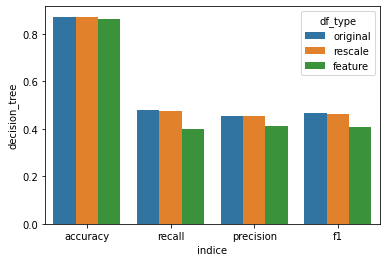

In [148]:
sns.barplot(df_models.indice, df_models.decision_tree, hue=df_tree.df_type)

And the winner is : \
\
**Original tree**

### Group random forest

<AxesSubplot:xlabel='indice', ylabel='random_forest'>

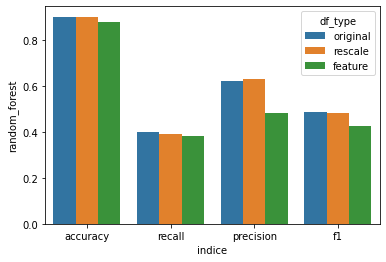

In [149]:
sns.barplot(df_models.indice, df_models.random_forest, hue=df_tree.df_type)

And the winner is : \
\
**Original random forest**

### Group random forest balanced

<AxesSubplot:xlabel='indice', ylabel='random_forest_balanced'>

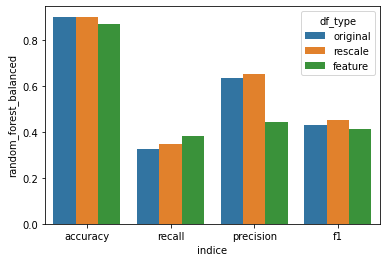

In [150]:
sns.barplot(df_models.indice, df_models.random_forest_balanced, hue=df_tree.df_type)

And the winner is : \
\
**Rescale random forest balanced**

### Group XGBoost

<AxesSubplot:xlabel='indice', ylabel='xgboost'>

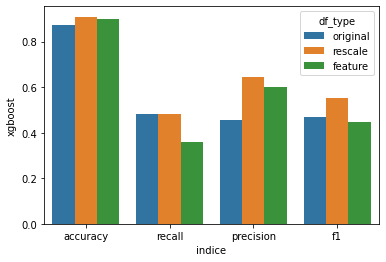

In [151]:
sns.barplot(df_models.indice, df_models.xgboost, hue=df_tree.df_type)

And the winner is : \
\
**Rescale XGBoost**

### Group Adaboost

<AxesSubplot:xlabel='indice', ylabel='adaboost'>

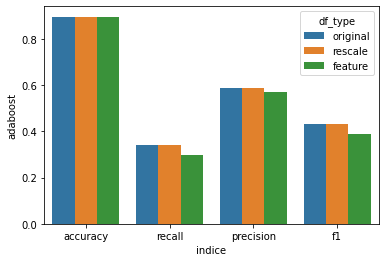

In [153]:
sns.barplot(df_models.indice, df_models.adaboost, hue=df_tree.df_type)

And the winner is : \
\
**Original Adaboost**

### Group Catboost

<AxesSubplot:xlabel='indice', ylabel='catboost'>

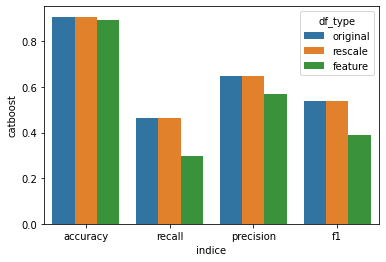

In [156]:
sns.barplot(df_models.indice, df_models.catboost, hue=df_tree.df_type)

And the winner is : \
\
**Original Catboost**

### Group KNeighbors

<AxesSubplot:xlabel='indice', ylabel='kneighbors'>

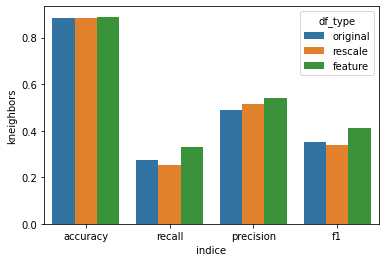

In [157]:
sns.barplot(df_models.indice, df_models.kneighbors, hue=df_tree.df_type)

And the winner is : \
\
**Feature KNeighbors**

### Logistic regression

<AxesSubplot:xlabel='indice', ylabel='logistic_regression'>

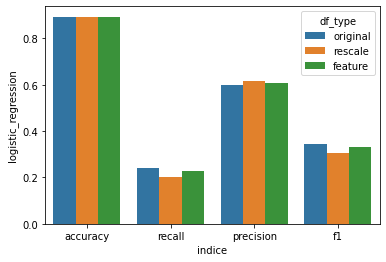

In [159]:
sns.barplot(df_models.indice, df_models.logistic_regression, hue=df_tree.df_type)

And the winner is : \
\
**Original Logistic regression**

### Group SVC

<AxesSubplot:xlabel='indice', ylabel='svc'>

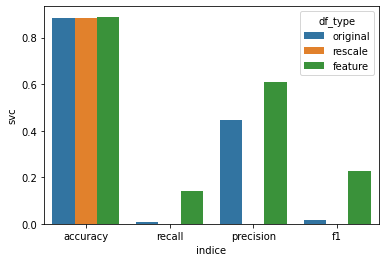

In [160]:
sns.barplot(df_models.indice, df_models.svc, hue=df_tree.df_type)

And the winner is : \
\
**Feature SVC**

### Group Gaussian

<AxesSubplot:xlabel='indice', ylabel='gaussian'>

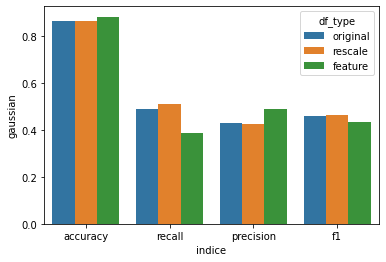

In [161]:
sns.barplot(df_models.indice, df_models.gaussian, hue=df_tree.df_type)

And the winner is : \
\
**Feature Gaussian**

## final phase

Quick recap of our 10 competitors:
* Original tree
* Original random forest
* Rescale random forest balanced
* Rescale XGBoost
* Original Adaboost
* Original Catboost
* Feature KNeighbors
* Original Logistic regression
* Feature SVC
* Feature Gaussian

In [168]:
data_f={'indice': pd.Series(['accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1','accuracy','recall','precision','f1']),
     'competitors': pd.Series(['original_tree','original_tree','original_tree','original_tree','original_random_forest','original_random_forest','original_random_forest','original_random_forest','rescale_random_forest_balanced','rescale_random_forest_balanced','rescale_random_forest_balanced','rescale_random_forest_balanced','rescale_xgboost','rescale_xgboost','rescale_xgboost','rescale_xgboost','original_adaboost','original_adaboost','original_adaboost','original_adaboost','original_catboost','original_catboost','original_catboost','original_catboost','feature_kneighbors','feature_kneighbors','feature_kneighbors','feature_kneighbors','original_logistic_regression','original_logistic_regression','original_logistic_regression','original_logistic_regression','feature_svc','feature_svc','feature_svc','feature_svc','feature_gaussian','feature_gaussian','feature_gaussian','feature_gaussian']), 
     'amount': pd.Series([acc1, rec1, pre1, f11, acc2, rec2, pre2, f12, acc3_sca, rec3_sca, pre3_sca, f13_sca, acc4_sca, rec4_sca, pre4_sca, f14_sca, acc5, rec5, pre5, f15, acc6, rec6, pre6, f16, acc7_fs, rec7_fs, pre7_fs, f17_fs, acc8, rec8, pre8, f18, acc9_fs, rec9_fs, pre9_fs, f19_fs, acc10_fs, rec10_fs, pre10_fs, f110_fs])}


In [169]:
df_models_f=pd.DataFrame(data_f)

In [170]:
df_models_f

indice                     competitors    amount
0    accuracy                   original_tree  0.872786
1      recall                   original_tree  0.480080
2   precision                   original_tree  0.455146
3          f1                   original_tree  0.467281
4    accuracy          original_random_forest  0.901956
5      recall          original_random_forest  0.401394
6   precision          original_random_forest  0.620955
7          f1          original_random_forest  0.487598
8    accuracy  rescale_random_forest_balanced  0.902535
9      recall  rescale_random_forest_balanced  0.346614
10  precision  rescale_random_forest_balanced  0.651685
11         f1  rescale_random_forest_balanced  0.452536
12   accuracy                 rescale_xgboost  0.909133
13     recall                 rescale_xgboost  0.484064
14  precision                 rescale_xgboost  0.645418
15         f1                 rescale_xgboost  0.553216
16   accuracy               original_adaboost  0.895474
17     recall               original_adaboost  0.339641
18  precision               original_adaboost  0.586919
19         f1               original_adaboost  0.430284
20   accuracy               original_catboost  0.908554
21     recall               original_catboost  0.463147
22  precision               original_catboost  0.649441
23         f1               original_catboost  0.540698
24   accuracy              feature_kneighbors  0.889455
25     recall              feature_kneighbors  0.331673
26  precision              feature_kneighbors  0.539708
27         f1              feature_kneighbors  0.410857
28   accuracy    original_logistic_regression  0.893043
29     recall    original_logistic_regression  0.241036
30  precision    original_logistic_regression  0.599010
31         f1    original_logistic_regression  0.343750
32   accuracy                     feature_svc  0.889571
33     recall                     feature_svc  0.140438
34  precision                     feature_svc  0.607759
35         f1                     feature_svc  0.228155
36   accuracy                feature_gaussian  0.881815
37     recall                feature_gaussian  0.388446
38  precision                feature_gaussian  0.489335
39         f1                feature_gaussian  0.433093

<AxesSubplot:xlabel='indice', ylabel='amount'>

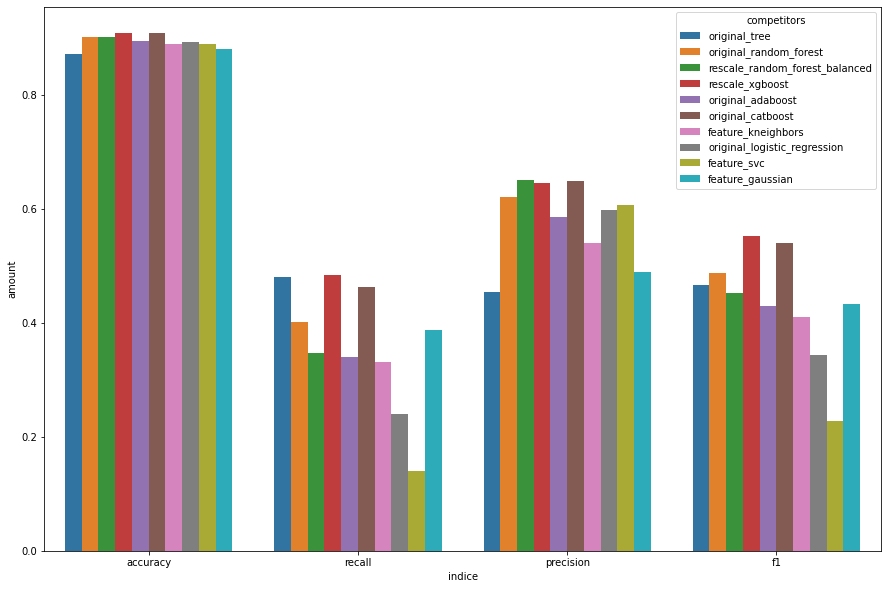

In [212]:
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(x='indice', y='amount', data=df_models_f, hue=df_models_f.competitors) #order=df_models_f.sort_values('amount', ascending=False))


**Top 5 in accuracy:**
* original catboost
* rescale xgboost
* original random forest
* rescale random forest balanced
* original adaboost

**Top 5 in recall:**
* rescale xgboost
* original tree
* original catboost
* original random forest
* feature gaussian

**Top 5 in precision:**
* rescale random forest balanced
* original catboost
* rescale xgboost
* original random forest
* feature svc

**Top 5 in f1:**
* rescale xgboost
* original cat boost
* original random forest
* original tree
* rescale random forest balanced

AND OUR FINAL WINNER OF 2020 BANK MARKETING DATASET MODELLING COMPETITION IS **RESCALE CATBOOST**

Ranking:
1. Rescale XGBBoost
2. Original CatBoost
3. Original random forest
4. Rescale random forest balanced
5. Original Decision Tree